## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
data = mouse_metadata.merge(study_results, how= 'left')
data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Group by drug and calculate mean on column Tumor Volume
mean = round(data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'], 2)

#create dataframe of mean
mean_df = pd.DataFrame(mean)

#Group by drug and calculate median on column Tumor Volume
median = round(data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'], 2)
median_df = pd.DataFrame(median)

#Group by drug and calculate Std. Deviation on column Tumor Volume
std_dev = round(data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'],2)
stddev_df = pd.DataFrame(std_dev)

#Group by drug and calculate Std. Error on column Tumor Volume
sem = round(data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)'],2)
sem_df = pd.DataFrame(sem)

#Merge tables 2 at a time
merge1 = mean_df.merge(median_df, on='Drug Regimen')
merge2 = merge1.merge(stddev_df, on='Drug Regimen')

#Rename column name with mean, median and so on:
merge2_renamed = merge2.rename(columns= {"Tumor Volume (mm3)_x":'Mean', 
                                         "Tumor Volume (mm3)_y": 'Median',
                                        "Tumor Volume (mm3)": 'Std Dev'})

summary_df = merge2_renamed.merge(sem_df, on='Drug Regimen')
summary_df = summary_df.rename(columns= {"Tumor Volume (mm3)": 'SEM'})
summary_df

,Mean,Median,Std Dev,SEM
Drug Regimen,,,,
Capomulin,40.68,41.56,4.99,0.33
Ceftamin,52.59,51.78,6.27,0.47
Infubinol,52.88,51.82,6.57,0.49
Ketapril,55.24,53.70,8.28,0.60
Naftisol,54.33,52.51,8.13,0.60
Placebo,54.03,52.29,7.82,0.58
Propriva,52.32,50.85,6.51,0.51
Ramicane,40.22,40.67,4.85,0.32
Stelasyn,54.23,52.43,7.71,0.57


## Bar plots

Text(0.5, 1.0, 'Data Points per Drug Regimen')

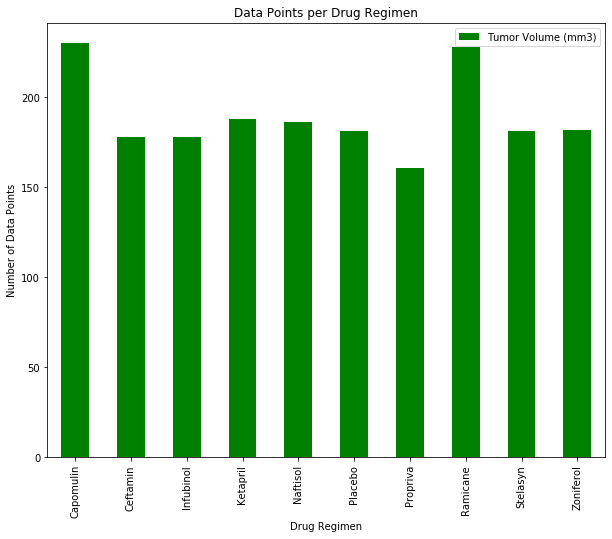

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

count = round(data.groupby(['Drug Regimen']).count()['Tumor Volume (mm3)'], 2)
count_df = pd.DataFrame(count)

chart = count_df.plot(kind='bar', figsize=(10,8), color= 'green')

# Set a title for the chart
chart.set_ylabel("Number of Data Points")
chart.set_title("Data Points per Drug Regimen")

# plt.show()
# plt.tight_layout()

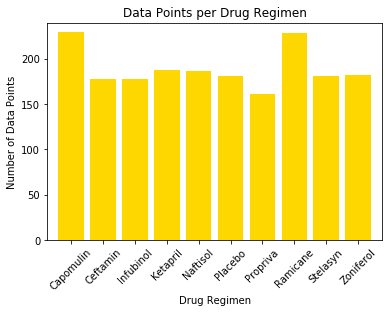

In [12]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# create an array of all the drugs in alphabetical order
drug_names = []
for drug in data["Drug Regimen"]:
    if drug not in drug_names:
        drug_names.append(drug)
        drug_names = sorted(drug_names)

# create x axis and tick locations
x_axis = np.arange(0, len(drug_names))
tick_locations = [] 
for x in x_axis:
    tick_locations.append(x)

# add labels
plt.title("Data Points per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

# create x and y limits using count_drug created above
plt.xlim(-0.75, len(count)-0.25)
plt.ylim(0, max(count) + 10)

# put bar chart together, color the bars using the color_list above, and rotate x labels
plt.bar(x_axis, count, color= 'gold', align="center")
plt.xticks(tick_locations, drug_names)
plt.xticks(rotation=45)
plt.show()




## Pie plots

Text(0.5, 1.0, 'Percentage of Male vs Female Mice')

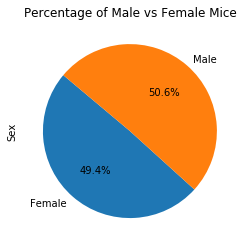

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# count the number of female and male mice used
mice_sex = data.groupby("Sex")["Sex"].count()

# create pie chart
mice_chart = mice_sex.plot(kind = "pie", autopct='%1.1f%%', startangle=140)
mice_chart.set_title("Percentage of Male vs Female Mice")

Text(0.5, 1.0, 'Percentage of Male vs Female Mice')

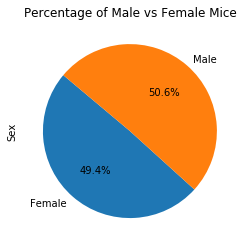

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# Creates the pie chart based upon the mice_sex values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(mice_sex, labels=labels, autopct="%1.1f%%", shadow=False, startangle=140)
plt.ylabel("Sex")
plt.title("Percentage of Male vs Female Mice")


## Quartiles, outliers and boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# group data by Mouse ID and find the max Timepoint, use this to find the final tumor vol
idx = data.groupby("Mouse ID")["Timepoint"].transform(max) == data["Timepoint"]
max_timepoint = data[idx]

# create an array for each of the four most promising treatment regimens
capomulin = max_timepoint.loc[max_timepoint["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"]
ramicane = max_timepoint.loc[max_timepoint["Drug Regimen"] == "Ramicane", "Tumor Volume (mm3)"]
infubinol = max_timepoint.loc[max_timepoint["Drug Regimen"] == "Infubinol", "Tumor Volume (mm3)"]
ceftamin = max_timepoint.loc[max_timepoint["Drug Regimen"] == "Ceftamin", "Tumor Volume (mm3)"]

# Calculate the quartiles and IQR  from each of the above arrays
# Quantitatively determine if there are any potential outliers.
ca_quartiles = capomulin.quantile([.25,.5,.75])
ca_lowerq = ca_quartiles[0.25]
ca_upperq = ca_quartiles[0.75]
ca_iqr = ca_upperq-ca_lowerq
ca_lower_bound = ca_lowerq - (1.5*ca_iqr)
ca_upper_bound = ca_upperq + (1.5*ca_iqr)
outlier_ca = capomulin.loc[(capomulin < ca_lower_bound) | (capomulin > ca_upper_bound)]

print(f"The lower quartile of Capomulin is: {ca_lowerq}")
print(f"The upper quartile of Capomulin is: {ca_upperq}")
print(f"The interquartile range of Capomulin is: {ca_iqr}")
print(f"The the median of Capomulin is: {ca_quartiles[0.5]} ")
print(f"Values below {ca_lower_bound} could be outliers.")
print(f"Values above {ca_upper_bound} could be outliers.")
print(f"There are {len(outlier_ca)} outliers for the drug Capomulin.")
print("-----------------------------------------------------")

r_quartiles = ramicane.quantile([.25,.5,.75])
r_lowerq = r_quartiles[0.25]
r_upperq = r_quartiles[0.75]
r_iqr = r_upperq-r_lowerq
r_lower_bound = r_lowerq - (1.5*r_iqr)
r_upper_bound = r_upperq + (1.5*r_iqr)
outlier_r = ramicane.loc[(ramicane < r_lower_bound) | (ramicane > r_upper_bound)]

print(f"The lower quartile of Ramicane is: {r_lowerq}")
print(f"The upper quartile of Ramicane is: {r_upperq}")
print(f"The interquartile range of Ramicane is: {r_iqr}")
print(f"The the median of Ramicane is: {r_quartiles[0.5]} ")
print(f"Values below {r_lower_bound} could be outliers.")
print(f"Values above {r_upper_bound} could be outliers.")
print(f"There are {len(outlier_r)} outliers for the drug Ramicane.")
print("-----------------------------------------------------")

i_quartiles = infubinol.quantile([.25,.5,.75])
i_lowerq = i_quartiles[0.25]
i_upperq = i_quartiles[0.75]
i_iqr = i_upperq-i_lowerq
i_lower_bound = i_lowerq - (1.5*i_iqr)
i_upper_bound = i_upperq + (1.5*i_iqr)
outlier_i = infubinol.loc[(infubinol < i_lower_bound) | (infubinol > i_upper_bound)]

print(f"The lower quartile of Infubinol is: {i_lowerq}")
print(f"The upper quartile of Infubinol is: {i_upperq}")
print(f"The interquartile range of Infubinol is: {i_iqr}")
print(f"The the median of Infubinol is: {i_quartiles[0.5]} ")
print(f"Values below {i_lower_bound} could be outliers.")
print(f"Values above {i_upper_bound} could be outliers.")
print(f"There is {len(outlier_i)} outlier for the drug Infubinol.")
print(f"The outlier is {outlier_i.min()}.")
print("-----------------------------------------------------")

c_quartiles = ceftamin.quantile([.25,.5,.75])
c_lowerq = c_quartiles[0.25]
c_upperq = c_quartiles[0.75]
c_iqr = c_upperq-c_lowerq
c_lower_bound = c_lowerq - (1.5*c_iqr)
c_upper_bound = c_upperq + (1.5*c_iqr)
outlier_c = ceftamin.loc[(ceftamin < c_lower_bound) | (ceftamin > c_upper_bound)]

print(f"The lower quartile of Ceftamin is: {c_lowerq}")
print(f"The upper quartile of Ceftamin is: {c_upperq}")
print(f"The interquartile range of Ceftamin is: {c_iqr}")
print(f"The the median of Ceftamin is: {c_quartiles[0.5]} ")
print(f"Values below {c_lower_bound} could be outliers.")
print(f"Values above {c_upper_bound} could be outliers.")
print(f"There are {len(outlier_c)} outliers for the drug Ceftamin.")
print("-----------------------------------------------------")





The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
There are 0 outliers for the drug Capomulin.
-----------------------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
There are 0 outliers for the drug Ramicane.
-----------------------------------------------------
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values belo

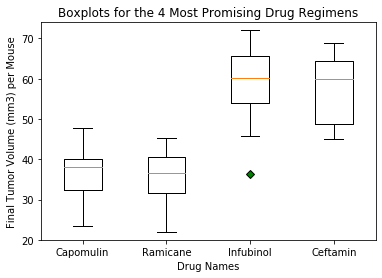

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

var = [capomulin,ramicane,infubinol,ceftamin]
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplots for the 4 Most Promising Drug Regimens')
ax1.set_xlabel('Drug Names')
ax1.set_ylabel('Final Tumor Volume (mm3) per Mouse')
ax1.boxplot(var, flierprops=green_diamond)
plt.xticks([1,2,3,4],['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.xlim(0.5,4.5)
plt.ylim(20,74)
plt.show()
            

## Line and scatter plots

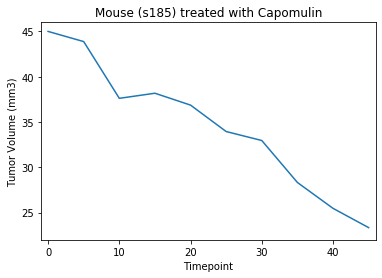

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Capomulin treated mouse id s185
mouse = data[data["Mouse ID"]=="s185"]

# define the x and y axis info
x_axis = mouse["Timepoint"]
y_axis = mouse["Tumor Volume (mm3)"]

# Create line plot
plt.plot(x_axis,y_axis)

# add labels
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("S185 Mouse treated with Capomulin")
plt.xlim(-1,46)
plt.ylim(22,46)
plt.show()

Text(0.5, 1.0, 'Mice for the Capomulin regimen')

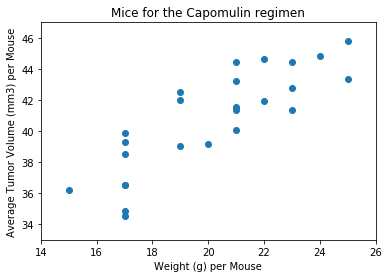

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# filter for only the Capomulin regimen, then group by Mouse
Capomulin_drug = data[data["Drug Regimen"]=="Capomulin"]
drug_permouse = Capomulin_drug.groupby("Mouse ID")

# Identify the x and y axes
weight = drug_permouse["Weight (g)"].min()
avg_tv = drug_permouse["Tumor Volume (mm3)"].mean()

# create scatter plot
plt.scatter(weight,avg_tv)
plt.xlim(14,26)
plt.ylim(33,47)

# add labels
plt.xlabel("Weight (g) per Mouse")
plt.ylabel("Average Tumor Volume (mm3) per Mouse")
plt.title("Mice for the Capomulin regimen")

The R-squared value is: 0.84
The linear regression equation is: y = 0.95x + 21.55


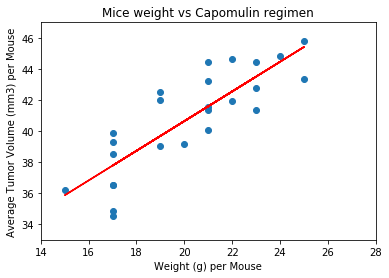

In [25]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tv)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create scatter plot with labels
plt.scatter(weight,avg_tv)
plt.xlim(14,28)
plt.ylim(33,47)
plt.plot(weight,regress_values,"r-")
plt.xlabel("Weight (g) per Mouse")
plt.ylabel("Average Tumor Volume (mm3) per Mouse")
plt.title("Mice weight vs Capomulin regimen")
print(f"The R-squared value is: {round(st.pearsonr(weight,avg_tv)[0],2)}")
print(f"The linear regression equation is: {line_eq}")
plt.show()